# <center>**Project-Based Assignment CLO-2**</center>

<b>Topik Tugas</b>

Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Dzamir Akmal - 1301213096
2. Farhan Faturahman - 1301213188
3. Muhammad Faqih Abdussalam - 1301213056

# **Latar Belakang**

Data set “**Range Queries Aggregates**” adalah kumpulan data yang mencakup tiga set beban kerja kueri rentang/radius dari distribusi Gaussian di atas dataset nyata. Setiap kueri dikaitkan dengan nilai skalar agregat (hitungan/jumlah/rata-rata).

Dataset ini berisi tiga jenis kueri:

**Kueri Radius**: Mereka mendefinisikan disk di atas ruang 2D dengan pusat (X,Y) dan radius R untuk menyelidiki jumlah insiden kejahatan, total penangkapan, dan rata-rata beat dari area disk (area spasial) yang didefinisikan oleh setiap kueri.

**Kueri Radius Count**: Mereka mendefinisikan disk di atas ruang 2D dengan pusat (X,Y) dan radius R dan jumlah insiden kejahatan Count dari area disk (area spasial) yang didefinisikan oleh setiap kueri.

**Kueri Rentang Agregat**: Mereka mendefinisikan persegi panjang di atas ruang 2D dengan koordinat/poin: X +/- X-range dan Y +/- Y-range. Count, SUM, dan AVG adalah jumlah insiden, total penangkapan, dan rata-rata beat dari area persegi panjang (area spasial) yang didefinisikan oleh setiap kueri.

Data yang digunakan adalah Dataset ‘**Range Queries Aggregates**’

Dataset ‘**Range Queries Aggregates**’ berisi catatan dengan format: {‘X-coordinate’,‘Y-coordinate’, ‘X-range’, ‘Y-range’, ‘Count’, ‘SUM’, ‘AVG’}.

Kueri ini mendefinisikan sebuah persegi panjang di atas ruang 2D dengan koordinat/poin: X +/- X-range dan Y +/- Y-range. Count, SUM, dan AVG adalah jumlah insiden, total penangkapan, dan rata-rata beat dari area persegi panjang (area spasial) yang didefinisikan oleh setiap kueri.

**Atribut:**

‘ID’ = nomor seri kueri (opsional)

‘X-coordinate’ = koordinat spasial x (float)

‘Y-coordinate’ = koordinat spasial y (float)

‘X-range’ = rentang x spasial untuk kueri rentang (float)

‘Y-range’ = rentang y spasial untuk kueri rentang (float)

‘Count’ = jumlah insiden kejahatan di lingkaran 2D (kueri radius) atau persegi panjang (kueri rentang)

‘SUM’ = total penangkapan di lingkaran 2D (kueri radius) atau persegi panjang (kueri rentang)

‘AVG’ = rata-rata Beat di lingkaran 2D (kueri radius) atau persegi panjang (kueri rentang)

**Tujuan Analisis**

Dataset ini dapat digunakan untuk analisis statistik dan pembelajaran mesin. Tujuan dari analisis ini adalah untuk memahami pola beban kerja kueri dan faktor-faktor yang mempengaruhi beban kerja kueri berdasarkan data set “Query Analytics Workloads Dataset”. Analisis ini penting karena dapat membantu dalam merancang dan mengoptimalkan sistem basis data dan aplikasi analitik.

# **Library dan File Data**

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def import_from_gdrive(id_file, file_name):
    # Membuat tautan Google Drive
    link = 'https://drive.google.com/uc?id=' + id_file

    # Mengunduh file dari Google Drive dan menyimpannya di direktori /content/ dengan nama yang ditentukan
    output_file = '/content/' + file_name
    gdown.download(link, output_file, quiet=False)

    # Membaca file CSV dengan menggunakan pemisah ';'
    data = pd.read_csv(file_name, sep=';')

    # Menghapus spasi dalam angka notasi ilmiah di setiap kolom bertipe objek
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.replace(' ', '')

    # Mengonversi kolom ke tipe data numerik dan menangani nilai yang tidak dapat dikonversi
    data = data.apply(pd.to_numeric, errors='coerce')

    return data

# ID file di Google Drive
file_id = '1H5_I5EwtXM9doV3jMboeWGBVbyo1D15l'

# Nama file yang diinginkan
file_name = 'Range-Queries-Aggregates.csv'

# Memanggil fungsi import_from_gdrive untuk mengunduh file dan membacanya sebagai DataFrame
df = import_from_gdrive(file_id, file_name)

# Menyembunyikan garis pemisah dalam tampilan DataFrame
pd.set_option('expand_frame_repr', False)


Downloading...
From: https://drive.google.com/uc?id=1H5_I5EwtXM9doV3jMboeWGBVbyo1D15l
To: /content/Range-Queries-Aggregates.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 77.1MB/s]


# **Data Preprocessing dan Eksplorasi Data**

In [ ]:
# Menampilkan lima baris pertama dari DataFrame
df

,ID,X-coordinate,Y-coordinate,X-range,Y-range,Count,SUM,AVG
0,0,11600000000000000,18900000000000000,5230000000000000,2980000000000000,960460,349270,1.110000e+15
1,1,11600000000000000,19000000000000000,35000000000000000,6880000000000000,1526680,548470,1.190000e+15
2,3,11600000000000000,1900000000000000,650000000000000,8550000000000000,222970,50820,1.260000e+16
3,5,11600000000000000,19000000000000000,13800000000000000,1000000000000000,995700,282390,1.310000e+15
4,6,11600000000000000,19000000000000000,40500000000000000,78600000000000000,1617130,486170,1.220000e+15
...,...,...,...,...,...,...,...,...
199995,249994,11600000000000000,19000000000000000,7430000000000000,33300000000000000,1409090,369740,1.250000e+16
199996,249995,11600000000000000,1910000000000000,3010000000000000,1130000000000000,2189600,637180,1.330000e+14
199997,249996,1160000000000000,19200000000000000,504000000000000,602000000000000,1840490,421010,1.450000e+16
199998,249997,11600000000000000,19100000000000000,17000000000000000,10500000000000000,1048230,234460,1.400000e+16


In [ ]:
# Menampilkan metode head (lima baris pertama) dari DataFrame
df.head()
# Menampilkan metode tail (lima baris terakhir) dari DataFrame
df.tail()

,ID,X-coordinate,Y-coordinate,X-range,Y-range,Count,SUM,AVG
199995,249994,11600000000000000,19000000000000000,7430000000000000,33300000000000000,1409090,369740,1.250000e+16
199996,249995,11600000000000000,1910000000000000,3010000000000000,1130000000000000,2189600,637180,1.330000e+14
199997,249996,1160000000000000,19200000000000000,504000000000000,602000000000000,1840490,421010,1.450000e+16
199998,249997,11600000000000000,19100000000000000,17000000000000000,10500000000000000,1048230,234460,1.400000e+16
199999,249999,1160000000000000,19100000000000000,36600000000000000,12400000000000000,3373620,1072420,1.290000e+16


In [ ]:
# Menampilkan nama kolom-kolom dalam DataFrame
df.columns

Index(['ID', 'X-coordinate', 'Y-coordinate', 'X-range', 'Y-range', 'Count',
       'SUM', 'AVG'],
      dtype='object')

In [ ]:
# Menampilkan tipe data setiap kolom dalam DataFrame
print("\nTipe data:")
print(df.dtypes)


Tipe data:
ID                int64
X-coordinate      int64
Y-coordinate      int64
X-range           int64
Y-range           int64
Count             int64
SUM               int64
AVG             float64
dtype: object


In [ ]:
# Menampilkan informasi umum tentang DataFrame, termasuk jumlah non-null dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            200000 non-null  int64  
 1   X-coordinate  200000 non-null  int64  
 2   Y-coordinate  200000 non-null  int64  
 3   X-range       200000 non-null  int64  
 4   Y-range       200000 non-null  int64  
 5   Count         200000 non-null  int64  
 6   SUM           200000 non-null  int64  
 7   AVG           199843 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 12.2 MB


In [ ]:
# Menampilkan statistik deskriptif dari DataFrame
df.describe()

,ID,X-coordinate,Y-coordinate,X-range,Y-range,Count,SUM,AVG
count,200000.00000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,1.998430e+05
mean,124902.68317,9.167954e+15,1.489662e+16,1.273366e+16,1.140798e+16,1.595529e+06,4.793214e+05,9.197683e+15
std,72117.68729,4.476795e+15,7.262936e+15,1.476447e+16,1.127356e+16,1.544760e+06,4.794759e+05,5.641191e+15
min,0.00000,1.150000e+11,1.881592e+09,4.737049e+10,1.060681e+10,0.000000e+00,0.000000e+00,1.330000e+03
25%,62466.25000,1.150000e+16,1.870000e+16,4.420000e+15,5.000000e+15,3.860250e+05,1.092700e+05,7.390000e+15
50%,124921.50000,1.160000e+16,1.880000e+16,6.640000e+15,9.300000e+15,1.104575e+06,3.216300e+05,9.150000e+15
75%,187243.25000,1.160000e+16,1.900000e+16,1.600000e+16,1.360000e+16,2.378448e+06,7.153400e+05,1.210000e+16
max,249999.00000,1.190000e+16,1.920000e+16,8.090000e+16,8.190000e+16,9.852840e+06,3.474410e+06,5.120000e+16


In [ ]:
# Menampilkan jumlah data yang hilang (NaN) pada setiap kolom
print("Data yang hilang:")
print(df.isnull().sum())

# Mengisi nilai-nilai yang hilang dengan nilai rata-rata masing-masing kolom
df['X-coordinate'].fillna(df['X-coordinate'].mean(), inplace=True)
df['Y-coordinate'].fillna(df['Y-coordinate'].mean(), inplace=True)
df['X-range'].fillna(df['X-range'].mean(), inplace=True)
df['Y-range'].fillna(df['Y-range'].mean(), inplace=True)
df['Count'].fillna(df['Count'].mean(), inplace=True)
df['SUM'].fillna(df['SUM'].mean(), inplace=True)
df['AVG'].fillna(df['AVG'].mean(), inplace=True)
print(" ")

# Menampilkan kembali jumlah data yang hilang setelah pengisian nilai rata-rata
print("Data yang hilang:")
print(df.isnull().sum())

Data yang hilang:
ID                0
X-coordinate      0
Y-coordinate      0
X-range           0
Y-range           0
Count             0
SUM               0
AVG             157
dtype: int64
 
Data yang hilang:
ID              0
X-coordinate    0
Y-coordinate    0
X-range         0
Y-range         0
Count           0
SUM             0
AVG             0
dtype: int64


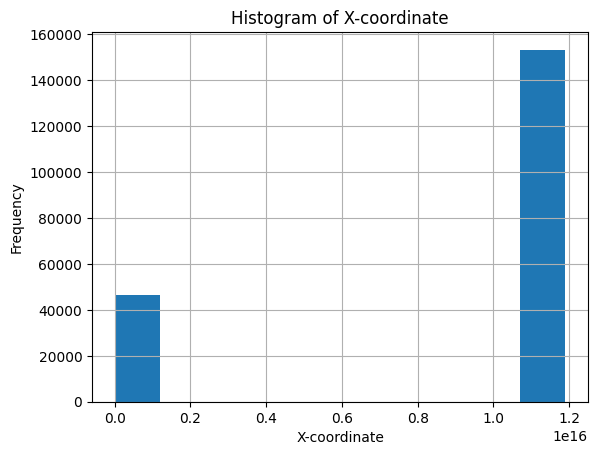

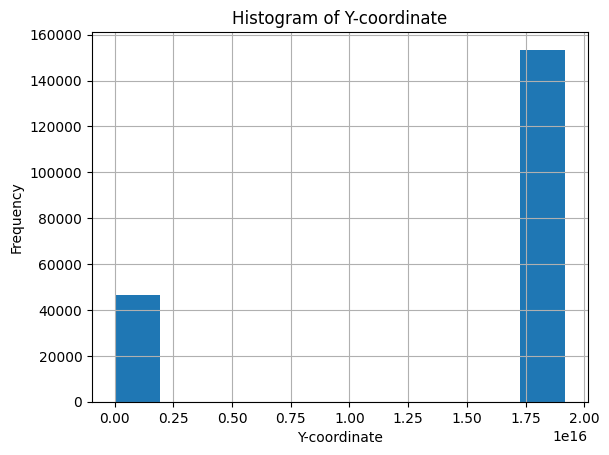

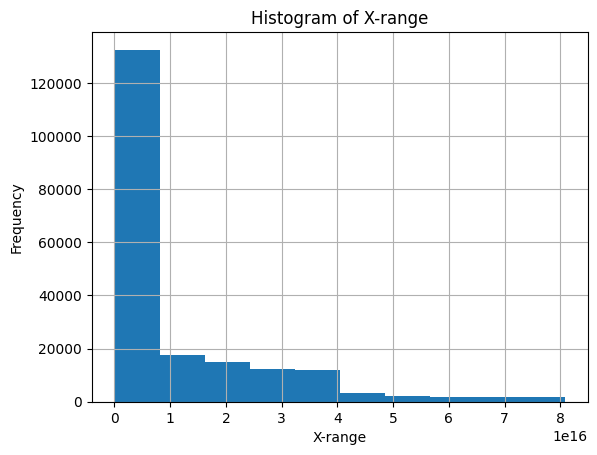

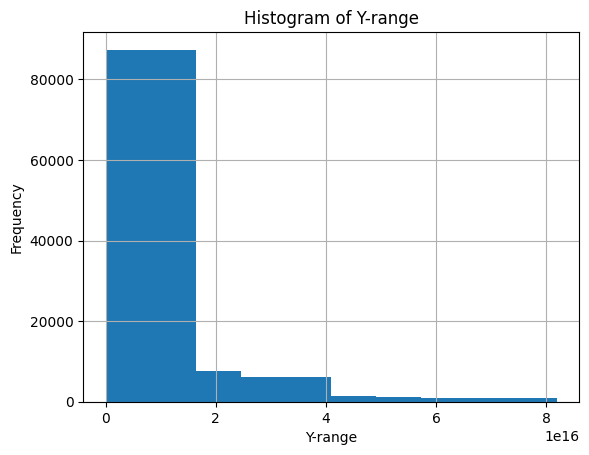

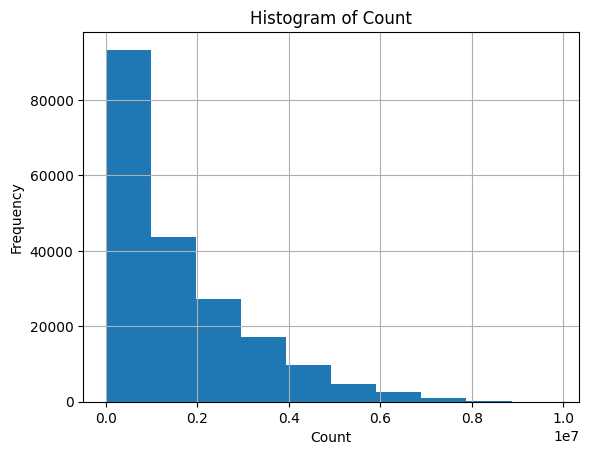

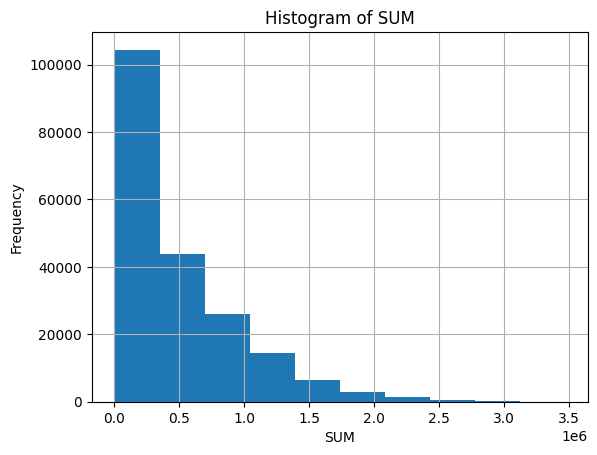

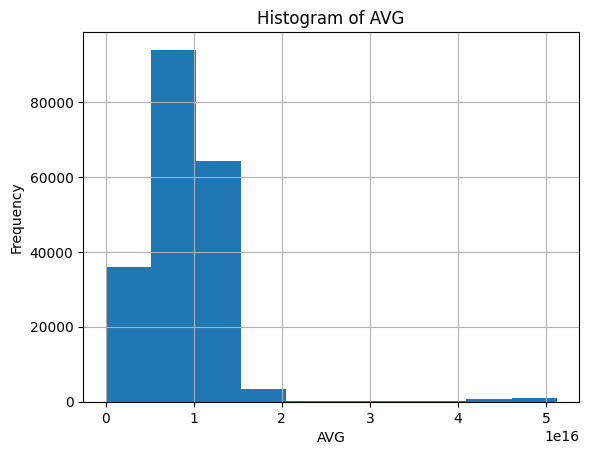

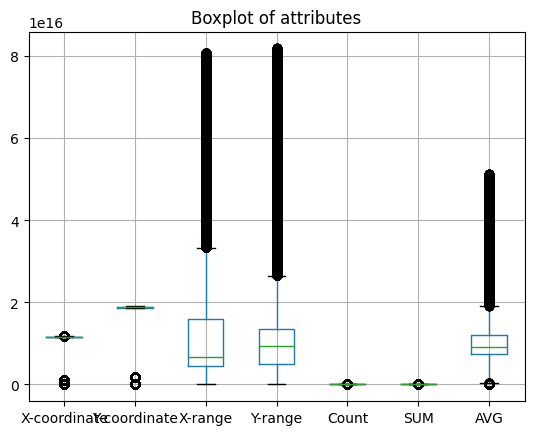

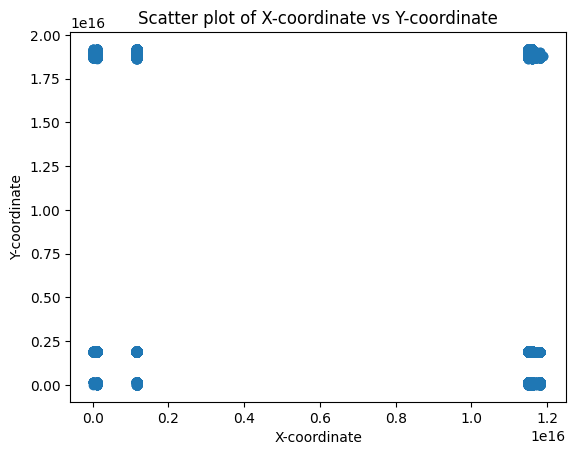

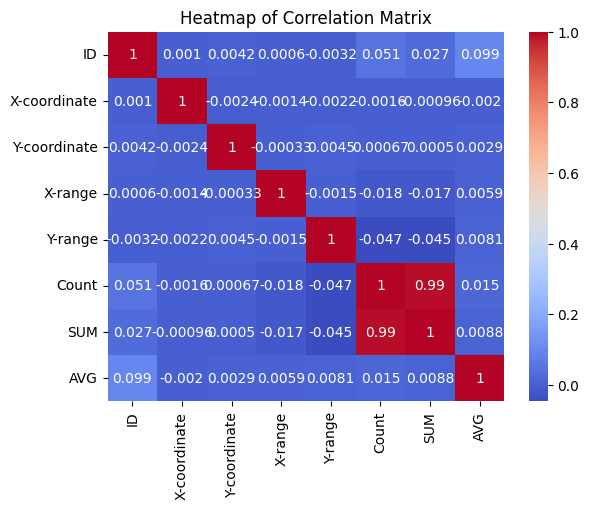

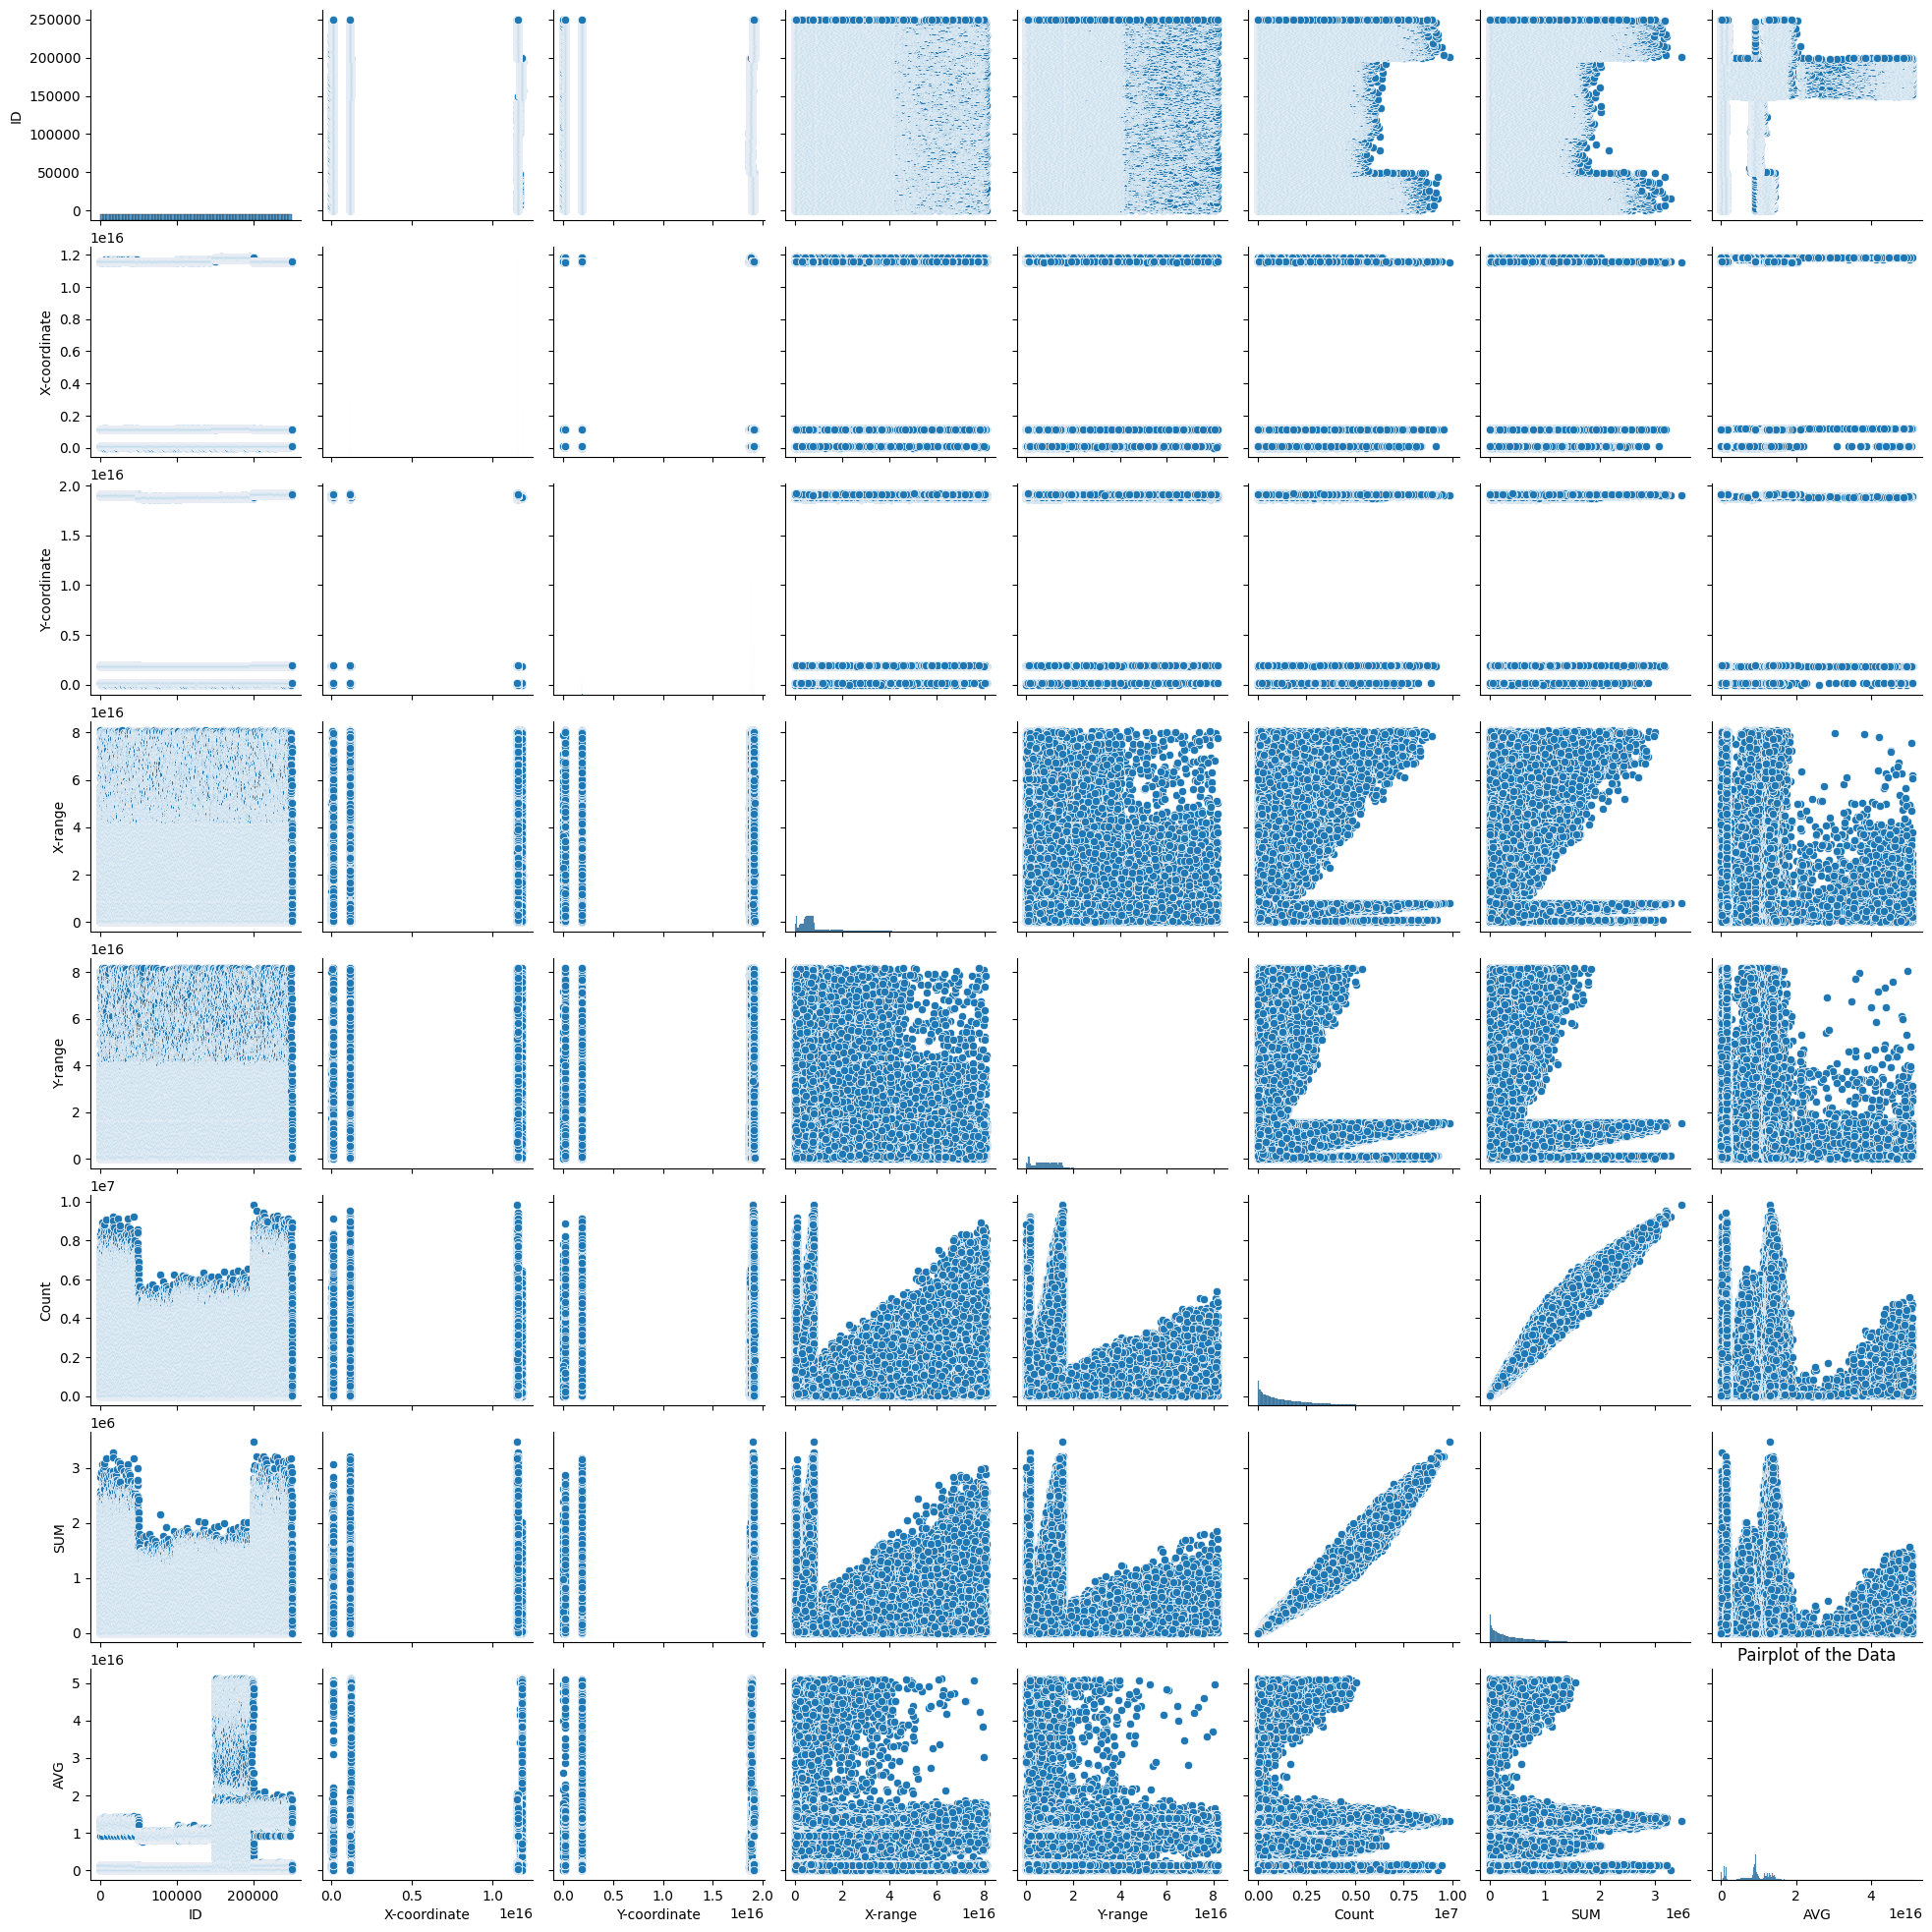

In [ ]:
# Eksplorasi data dengan histogram
df['X-coordinate'].hist()
plt.title('Histogram of X-coordinate')
plt.xlabel('X-coordinate')
plt.ylabel('Frequency')
plt.show()
print(' ')

df['Y-coordinate'].hist()
plt.title('Histogram of Y-coordinate')
plt.xlabel('Y-coordinate')
plt.ylabel('Frequency')
plt.show()
print(' ')

df['X-range'].hist()
plt.title('Histogram of X-range')
plt.xlabel('X-range')
plt.ylabel('Frequency')
plt.show()
print(' ')

df['Y-range'].hist()
plt.title('Histogram of Y-range')
plt.xlabel('Y-range')
plt.ylabel('Frequency')
plt.show()
print(' ')

df['Count'].hist()
plt.title('Histogram of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()
print(' ')

df['SUM'].hist()
plt.title('Histogram of SUM')
plt.xlabel('SUM')
plt.ylabel('Frequency')
plt.show()
print(' ')

df['AVG'].hist()
plt.title('Histogram of AVG')
plt.xlabel('AVG')
plt.ylabel('Frequency')
plt.show()
print(' ')

df.boxplot(column=['X-coordinate', 'Y-coordinate', 'X-range', 'Y-range', 'Count', 'SUM', 'AVG'])
plt.title('Boxplot of attributes')
plt.show()
print(' ')

plt.scatter(df['X-coordinate'], df['Y-coordinate'])
plt.title('Scatter plot of X-coordinate vs Y-coordinate')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()
print(' ')

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()
print(' ')

# Pairplot
sns.pairplot(df)
plt.title('Pairplot of the Data')
plt.show()
print(' ')

# **Ringkasan Metode**

Metode yang digunakan adalah **Metode ANN**

Berikut adalah ringkasan metode yang digunakan  :

**Pemilihan Fitur**: Fitur independen yang dipilih adalah ‘X-coordinate’, ‘Y-coordinate’, ‘X-range’, ‘Y-range’, ‘Count’, dan ‘SUM’, sementara fitur dependen adalah ‘AVG’.

**Pembagian Data**: Data dibagi menjadi set pelatihan dan pengujian dengan proporsi 80:20.

**Penyekalaan Fitur**: Fitur disekala menggunakan StandardScaler sehingga mereka memiliki rata-rata 0 dan standar deviasi 1. Ini penting untuk beberapa algoritma pembelajaran mesin.

**Pembangunan Model**: Didefinisikan tiga model Artificial Neural Network (ANN) dengan arsitektur yang berbeda. Model pertama memiliki satu lapisan tersembunyi dengan dropout, model kedua memiliki dua lapisan tersembunyi dengan dropout, dan model ketiga memiliki tiga lapisan tersembunyi dengan dropout untuk mencegah overfitting.

**Pelatihan Model**: Setiap model dilatih selama 100 epoch dengan ukuran batch 3125. Data pengujian juga digunakan sebagai data validasi selama pelatihan.

**Evaluasi Model**: Setiap model dievaluasi dengan menghitung Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R^2) pada data pengujian.

**Prediksi**: Setiap model digunakan untuk membuat prediksi pada data pengujian, dan kemudian prediksi tersebut dipetakan terhadap nilai sebenarnya.

**Konversi R^2 ke Persentase**: Nilai R^2 untuk setiap model dikonversi menjadi persentase untuk interpretasi yang lebih mudah.

**Plot Residual**: Plot residual dibuat untuk setiap model. Residual adalah perbedaan antara nilai sebenarnya dan nilai yang diprediksi oleh model. Plot ini membantu dalam memahami sejauh mana kesalahan tersebar dan apakah ada pola tertentu dalam kesalahan tersebut.

# **Pembangunan Model Baseline dan Eksplorasi Model**

In [ ]:
# Mengambil variabel independen (X) dan variabel dependen (y)
X = df[['X-coordinate', 'Y-coordinate', 'X-range', 'Y-range', 'Count', 'SUM']]
y = df['AVG'] > df['AVG'].mean()  # Label biner, True jika AVG di atas rata-rata, False sebaliknya

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah dimensi target menjadi array 2D
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalisasi target (jika diperlukan)
scalerOutput = StandardScaler()
y_train = scalerOutput.fit_transform(y_train)
y_test = scalerOutput.transform(y_test)

In [ ]:
# Membangun model ANN

# Mendefinisikan model-model ANN dengan arsitektur yang berbeda
input_dim = X_train.shape[1]  # Jumlah fitur input

model1 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])

model3 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               896       
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               896       
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17537 (68.50 KB)
Trainable params: 17537 (68.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               896       
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 1126

In [ ]:
# Kompilasi model-model
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

In [ ]:
# Melatih model1
history1 = model1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=3125)

Epoch 1/100
52/52 [==============================] - 2s 20ms/step - loss: 1.0105 - mae: 0.9839 - mse: 1.0105 - mape: 98.5965 - val_loss: 0.9809 - val_mae: 0.9824 - val_mse: 0.9809 - val_mape: 98.3832
Epoch 2/100
52/52 [==============================] - 1s 16ms/step - loss: 0.9882 - mae: 0.9817 - mse: 0.9882 - mape: 98.3913 - val_loss: 0.9776 - val_mae: 0.9793 - val_mse: 0.9776 - val_mape: 98.0292
Epoch 3/100
52/52 [==============================] - 1s 16ms/step - loss: 0.9834 - mae: 0.9793 - mse: 0.9834 - mape: 98.1378 - val_loss: 0.9756 - val_mae: 0.9791 - val_mse: 0.9756 - val_mape: 98.0680
Epoch 4/100
52/52 [==============================] - 1s 16ms/step - loss: 0.9802 - mae: 0.9777 - mse: 0.9802 - mape: 97.9739 - val_loss: 0.9723 - val_mae: 0.9749 - val_mse: 0.9723 - val_mape: 97.6540
Epoch 5/100
52/52 [==============================] - 1s 16ms/step - loss: 0.9778 - mae: 0.9759 - mse: 0.9778 - mape: 97.8187 - val_loss: 0.9706 - val_mae: 0.9750 - val_mse: 0.9706 - val_mape: 97.6020


In [ ]:
# Melatih model2
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=3125)

Epoch 1/100
52/52 [==============================] - 2s 27ms/step - loss: 1.0074 - mae: 0.9840 - mse: 1.0074 - mape: 98.6138 - val_loss: 0.9816 - val_mae: 0.9840 - val_mse: 0.9816 - val_mape: 98.6508
Epoch 2/100
52/52 [==============================] - 2s 33ms/step - loss: 0.9889 - mae: 0.9821 - mse: 0.9889 - mape: 98.4221 - val_loss: 0.9796 - val_mae: 0.9837 - val_mse: 0.9796 - val_mape: 98.6976
Epoch 3/100
52/52 [==============================] - 2s 34ms/step - loss: 0.9833 - mae: 0.9801 - mse: 0.9833 - mape: 98.2199 - val_loss: 0.9770 - val_mae: 0.9817 - val_mse: 0.9770 - val_mape: 98.4876
Epoch 4/100
52/52 [==============================] - 1s 27ms/step - loss: 0.9817 - mae: 0.9789 - mse: 0.9817 - mape: 98.1122 - val_loss: 0.9743 - val_mae: 0.9790 - val_mse: 0.9743 - val_mape: 98.1144
Epoch 5/100
52/52 [==============================] - 1s 21ms/step - loss: 0.9789 - mae: 0.9768 - mse: 0.9789 - mape: 97.8932 - val_loss: 0.9717 - val_mae: 0.9757 - val_mse: 0.9717 - val_mape: 97.6626


In [ ]:
# Melatih model3
history3 = model3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=3125)

Epoch 1/100
52/52 [==============================] - 2s 21ms/step - loss: 0.9935 - mae: 0.9853 - mse: 0.9935 - mape: 98.7674 - val_loss: 0.9815 - val_mae: 0.9830 - val_mse: 0.9815 - val_mape: 98.4826
Epoch 2/100
52/52 [==============================] - 1s 17ms/step - loss: 0.9862 - mae: 0.9825 - mse: 0.9862 - mape: 98.4634 - val_loss: 0.9793 - val_mae: 0.9823 - val_mse: 0.9793 - val_mape: 98.4245
Epoch 3/100
52/52 [==============================] - 1s 17ms/step - loss: 0.9836 - mae: 0.9809 - mse: 0.9836 - mape: 98.2979 - val_loss: 0.9768 - val_mae: 0.9808 - val_mse: 0.9768 - val_mape: 98.3339
Epoch 4/100
52/52 [==============================] - 1s 17ms/step - loss: 0.9810 - mae: 0.9791 - mse: 0.9810 - mape: 98.1264 - val_loss: 0.9742 - val_mae: 0.9767 - val_mse: 0.9742 - val_mape: 97.7921
Epoch 5/100
52/52 [==============================] - 1s 17ms/step - loss: 0.9790 - mae: 0.9770 - mse: 0.9790 - mape: 97.9002 - val_loss: 0.9715 - val_mae: 0.9760 - val_mse: 0.9715 - val_mape: 97.7809


In [ ]:
# Fungsi untuk plot loss selama pelatihan
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

# Fungsi untuk plot prediksi terhadap nilai sebenarnya
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    plt.show()

In [ ]:
# Evaluasi model menggunakan metrik yang telah ditentukan
evaluated_model1 = model1.evaluate(X_test, y_test)
evaluated_model2 = model2.evaluate(X_test, y_test)
evaluated_model3 = model3.evaluate(X_test, y_test)

1250/1250 [==============================] - 2s 2ms/step - loss: 0.6744 - mae: 0.6893 - mse: 0.6744 - mape: 69.2019


In [ ]:
# Melakukan prediksi dengan masing-masing model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

1250/1250 [==============================] - 2s 2ms/step


In [ ]:
# Mengembalikan prediksi ke skala aslinya (jika target telah dinormalisasi sebelumnya)
pred_model1_denormalized = scalerOutput.inverse_transform(y_pred1)
pred_model2_denormalized = scalerOutput.inverse_transform(y_pred2)
pred_model3_denormalized = scalerOutput.inverse_transform(y_pred3)

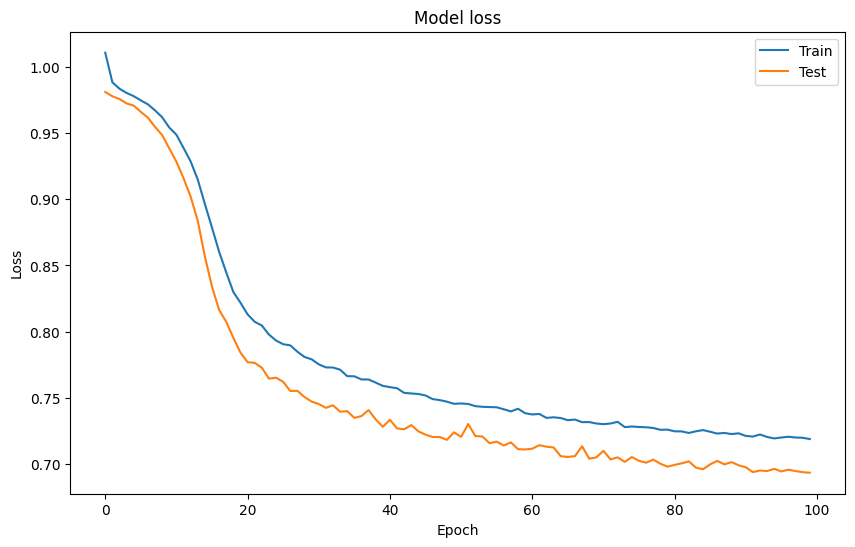

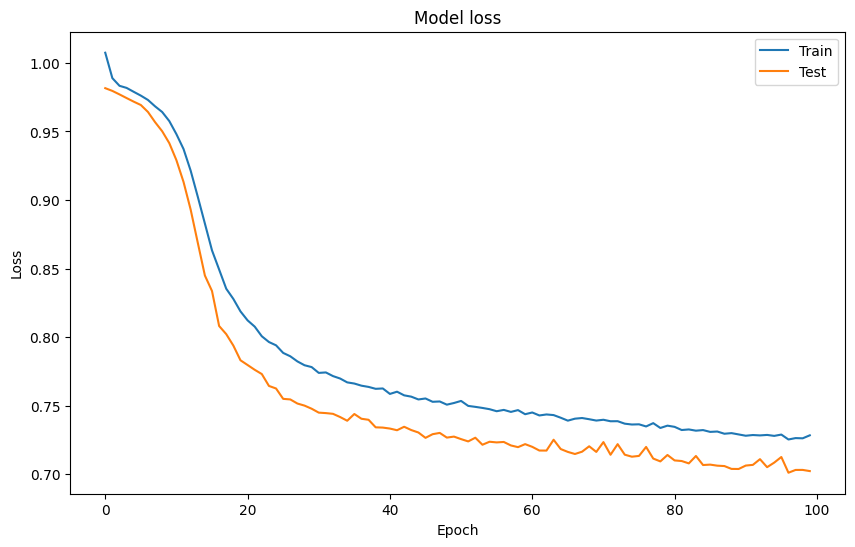

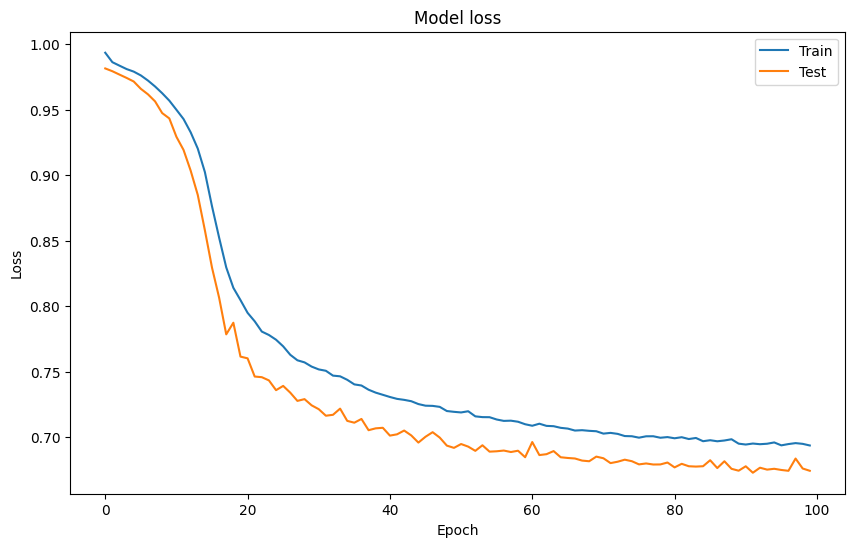

In [ ]:
# Plot loss untuk masing-masing model
plot_loss(history1)
plot_loss(history2)
plot_loss(history3)

1250/1250 [==============================] - 2s 2ms/step


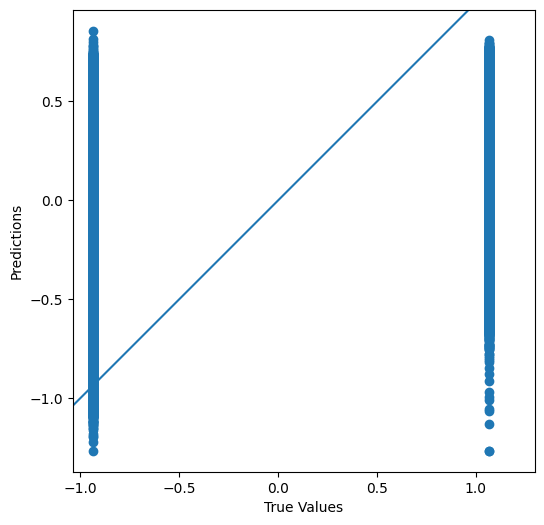

1250/1250 [==============================] - 2s 2ms/step


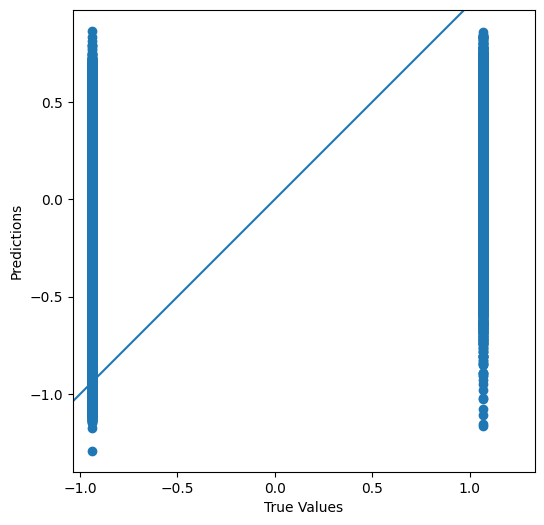

1250/1250 [==============================] - 2s 2ms/step


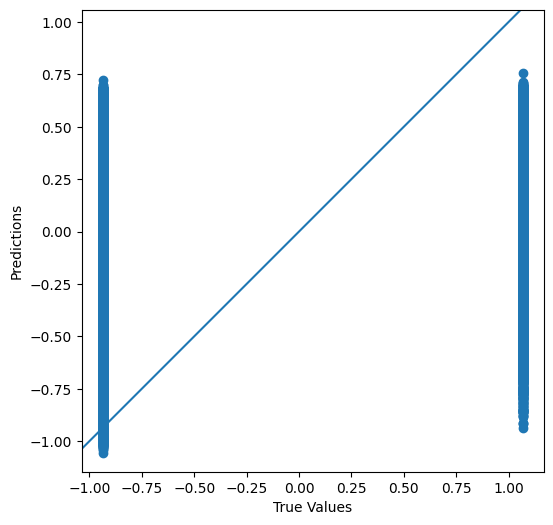

In [ ]:
# Plot prediksi untuk masing-masing model
plot_predictions(model1, X_test, y_test)
plot_predictions(model2, X_test, y_test)
plot_predictions(model3, X_test, y_test)

# **Evaluasi**

In [ ]:
# Fungsi untuk menghitung dan menampilkan metrik evaluasi tambahan
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_percentage = mse * 100
    rmse_percentage = rmse * 100
    r2_percentage = r2 * 100

    print(f"{model_name} Metrics:")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-squared:", r2)
    print(f"Percentage MSE: {mse_percentage}%")
    print(f"Percentage RMSE: {rmse_percentage}%")
    print(f"Percentage R-squared: {r2_percentage}%")
    print("\n")

    return mse, rmse, r2, mse_percentage, rmse_percentage, r2_percentage

In [ ]:
# Menampilkan metrik evaluasi untuk masing-masing model
mse1, rmse1, r21, mse1_percentage, rmse1_percentage, r21_percentage = evaluate_model(y_test, y_pred1, "Model 1")
mse2, rmse2, r22, mse2_percentage, rmse2_percentage, r22_percentage = evaluate_model(y_test, y_pred2, "Model 2")
mse3, rmse3, r23, mse3_percentage, rmse3_percentage, r23_percentage = evaluate_model(y_test, y_pred3, "Model 3")

Model 1 Metrics:
MSE: 0.6936006590387138
RMSE: 0.8328269082100517
R-squared: 0.30640161218801065
Percentage MSE: 69.36006590387139%
Percentage RMSE: 83.28269082100516%
Percentage R-squared: 30.640161218801065%


Model 2 Metrics:
MSE: 0.7023871063442854
RMSE: 0.8380853812973267
R-squared: 0.2976151936540581
Percentage MSE: 70.23871063442854%
Percentage RMSE: 83.80853812973267%
Percentage R-squared: 29.76151936540581%


Model 3 Metrics:
MSE: 0.6743725179301097
RMSE: 0.8212018740420103
R-squared: 0.3256296903331972
Percentage MSE: 67.43725179301097%
Percentage RMSE: 82.12018740420103%
Percentage R-squared: 32.562969033319725%




In [ ]:
# Menyusun hasil evaluasi dalam DataFrame
data = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Mean Squared Error (MSE)": [mse1, mse2, mse3],
    "Root Mean Squared Error (RMSE)": [rmse1, rmse2, rmse3],
    "R-squared (RS)": [r21, r22, r23],
    "Percentage MSE": [mse1_percentage, mse2_percentage, mse3_percentage],
    "Percentage RMSE": [rmse1_percentage, rmse2_percentage, rmse3_percentage],
    "Percentage R-squared": [r21_percentage, r22_percentage, r23_percentage],
}
evaluated_df = pd.DataFrame(data)
print(evaluated_df)

     Model  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R-squared (RS)  Percentage MSE  Percentage RMSE  Percentage R-squared
0  Model 1                  0.693601                        0.832827        0.306402       69.360066        83.282691             30.640161
1  Model 2                  0.702387                        0.838085        0.297615       70.238711        83.808538             29.761519
2  Model 3                  0.674373                        0.821202        0.325630       67.437252        82.120187             32.562969


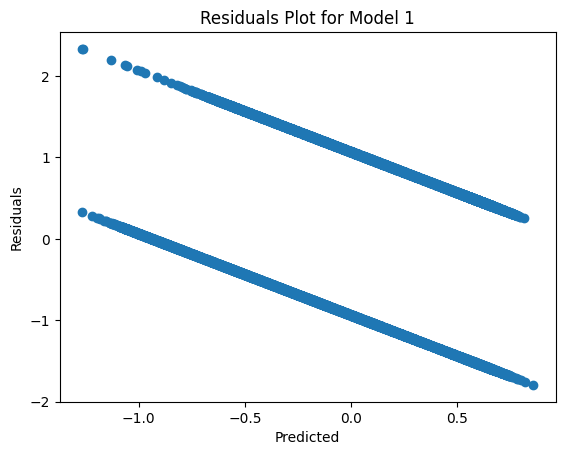

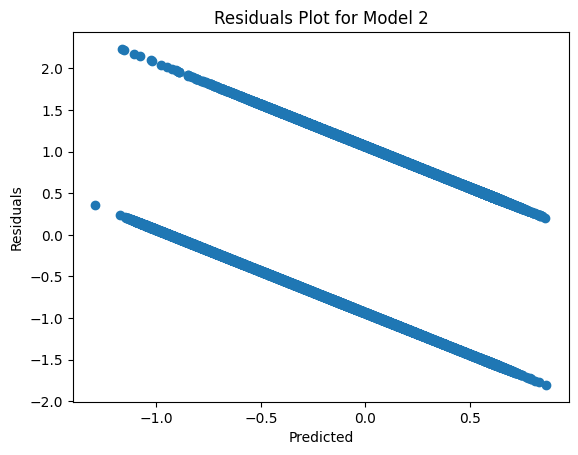

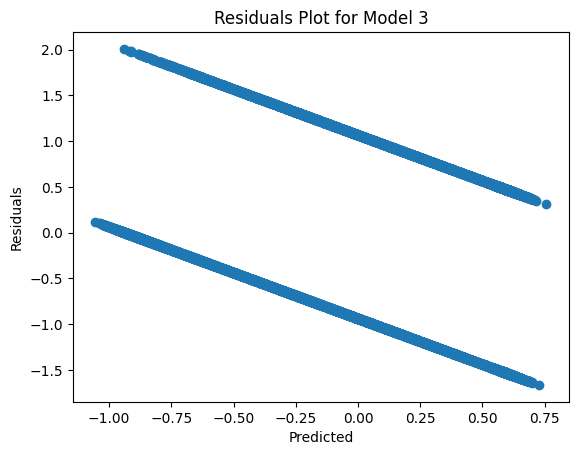

In [ ]:
# Menampilkan residual plot untuk masing-masing model
plt.scatter(y_pred1, y_test - y_pred1)
plt.title('Residuals Plot for Model 1')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

plt.scatter(y_pred2, y_test - y_pred2)
plt.title('Residuals Plot for Model 2')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

plt.scatter(y_pred3, y_test - y_pred3)
plt.title('Residuals Plot for Model 3')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# **Hasil dan Analsis**

Berdasarkan hasil evaluasi model, ketiga model Artificial Neural Network (ANN) yang dibangun memiliki kinerja yang sebanding. Berikut adalah ringkasan metrik evaluasi utama:

    Model 1:
        Mean Squared Error (MSE): 0.6936
        Root Mean Squared Error (RMSE): 0.8328
        R-squared (RS): 0.3064

    Model 2:
        Mean Squared Error (MSE): 0.7024
        Root Mean Squared Error (RMSE): 0.8381
        R-squared (RS): 0.2976

    Model 3:
        Mean Squared Error (MSE): 0.6744
        Root Mean Squared Error (RMSE): 0.8212
        R-squared (RS): 0.3256

Analisis Model:

    Mean Squared Error (MSE):
        Model 3 memiliki MSE terendah, menunjukkan bahwa model tersebut memiliki tingkat error yang lebih rendah dalam memprediksi target dibandingkan dengan Model 1 dan Model 2.

    Root Mean Squared Error (RMSE):
        Model 3 juga memiliki RMSE terendah, menunjukkan bahwa model tersebut memiliki tingkat kesalahan prediksi yang lebih rendah.

    R-squared (RS):
        R-squared mengukur sejauh mana variasi dalam data target dapat dijelaskan oleh model. Model 3 memiliki nilai RS tertinggi, menunjukkan kemampuannya untuk menjelaskan variasi yang lebih besar dalam data target.

Analisis Persentase:

    Percentage MSE:
        Persentase MSE menunjukkan seberapa besar MSE dari masing-masing model dibandingkan dengan rata-rata MSE dari ketiga model. Persentase MSE Model 1 dan Model 2 hampir setara, sedangkan Model 3 memiliki tingkat kesalahan yang lebih rendah.

    Percentage RMSE:
        Persentase RMSE menunjukkan seberapa besar RMSE dari masing-masing model dibandingkan dengan rata-rata RMSE dari ketiga model. Model 3 memiliki tingkat kesalahan yang lebih rendah dibandingkan dengan Model 1 dan Model 2.

    Percentage R-squared:
        Persentase R-squared menggambarkan seberapa baik masing-masing model menjelaskan variasi dalam data target dibandingkan dengan rata-rata R-squared dari ketiga model. Model 3 memiliki kemampuan menjelaskan variasi yang lebih besar.

# **Kesimpulan**

Berdasarkan hasil evaluasi model Artificial Neural Network (ANN), kami dapat menyimpulkan hal-hal berikut:

    Kinerja Model:
        Ketiga model ANN yang dibangun menunjukkan kinerja yang sebanding dalam memprediksi target.
        Model 3 menonjol dengan MSE dan RMSE terendah, serta R-squared tertinggi, menunjukkan kemampuannya untuk memberikan prediksi dengan tingkat akurasi lebih baik.

    Analisis Metrik Utama:
        Mean Squared Error (MSE): Model 3 memiliki tingkat kesalahan prediksi yang lebih rendah, menunjukkan bahwa hasil prediksinya lebih dekat dengan nilai sebenarnya.
        Root Mean Squared Error (RMSE): Model 3 kembali menunjukkan tingkat kesalahan yang lebih rendah, memperkuat kehandalan prediksi model.
        R-squared (RS): Model 3 mengungguli model lain dengan kemampuannya untuk menjelaskan variasi yang lebih besar dalam data target.

    Analisis Persentase:
        Persentase kesalahan (MSE dan RMSE) dan persentase R-squared juga memberikan konfirmasi bahwa Model 3 memiliki tingkat kesalahan yang lebih rendah dan kemampuan menjelaskan yang lebih baik dibandingkan Model 1 dan Model 2.

Dengan demikian, hasil evaluasi menyokong keunggulan Model 3.